Atividade de Vinhos Continuação

*normalização, metrica e algoritmos

**Aluna: Laís Ingrid Soares de Souza Vidoto**

link->https://archive.ics.uci.edu/ml/datasets/wine

 em conclusão, á melhor* tecnica é a AgglomerativeClustering* que melhor mostra que são necessarias *3 clusters* de *metrica calinski_harabasz_score*, como mostra no grafico 

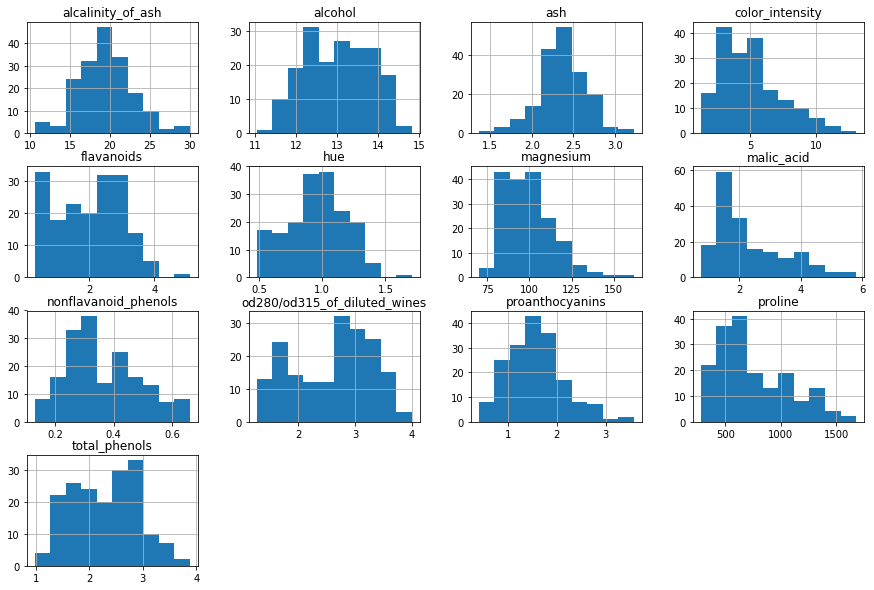

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # graficos

from sklearn import datasets

%matplotlib inline

# pegando os dados da tabela de vinhos
vinhos = datasets.load_wine()
# lendo os dados e as separando em dados e nome de cada coluna
df = pd.DataFrame(vinhos['data'], columns=vinhos['feature_names'])  
# renderizar com as seguintes dimenções altura e largura
df.hist( figsize=(15,10) );

(0, 1)

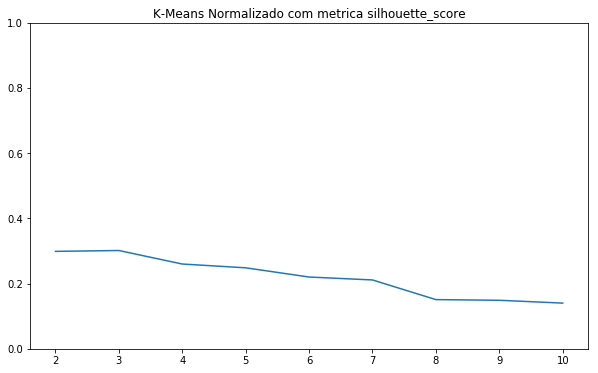

In [35]:
# tecnica de K-Means, com normalização e com metrica silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

k_range = range(2, 11) 
sil_norm = []
 
for k in k_range:
     
  model = KMeans( n_clusters=k )
  model = model.fit(X_norm)
  sil_norm.append( silhouette_score(X_norm, model.labels_) )
   
f, (ax2) = plt.subplots(1, figsize=(10, 6))

ax2.plot(k_range, sil_norm)
ax2.set_title('K-Means Normalizado com metrica silhouette_score');
ax2.set_ylim(0,1)

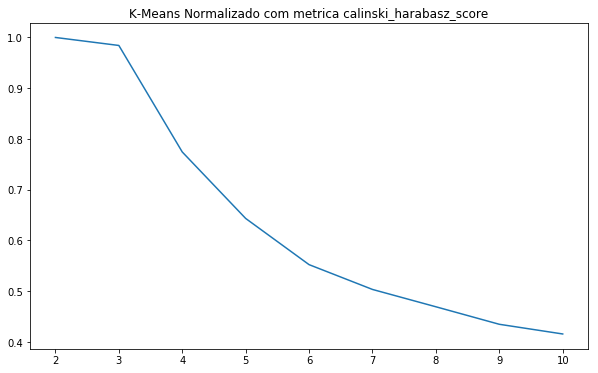

In [44]:
# tecnica de K-Means com normalização com metrica calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import calinski_harabasz_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

maiorValor = 0
cont = 0
k_range = range(2, 11) 
ch_norm = []

for k in k_range:
  
  cont = cont+1 
  model = KMeans(n_clusters=k)
  model = model.fit(X_norm)
  ch_norm.append(calinski_harabasz_score(X_norm, model.labels_))
     
# terei que normalizar os dados dele para que eu possa realizar á comparação de metricas do grafico abaixo    
# transformação de dados em array    
a = np.asarray(ch_norm)
# dividindo o total de resultados pelo valor maximo
resultado = a/np.max(a)  

f, (ax2) = plt.subplots(1, figsize=(10, 6))

ax2.plot(k_range, resultado)
ax2.set_title('K-Means Normalizado com metrica calinski_harabasz_score'); 

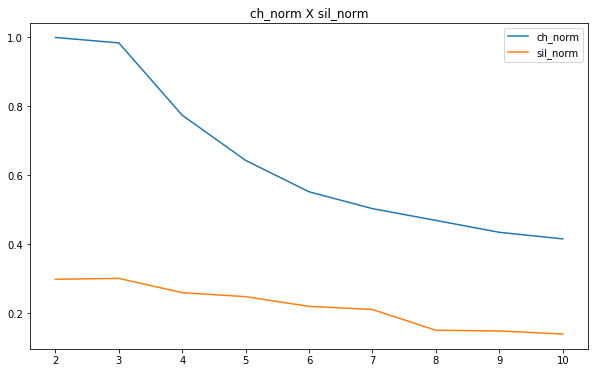

In [46]:
# tecnica de K-Means com normalização com metrica calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

# com a normalização dos dados de ch_norm, ai consigo fazer a comparação dos dados com a metrica sil_norm
#pos antes ele tinha valores muito altos para serem considerados, mais dessa forma fica mais facil de visualizar
f, (ax2) = plt.subplots(1, figsize=(10, 6) )
 
ax2.plot(k_range, resultado, label='ch_norm')
ax2.plot(k_range, sil_norm, label='sil_norm')
ax2.set_title('ch_norm X sil_norm');
ax2.legend()


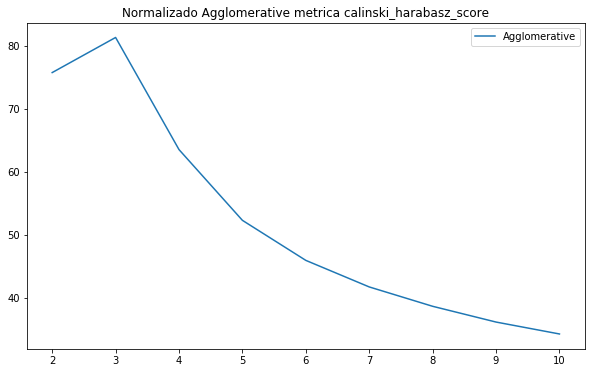

In [20]:
# tecnica de aglutinação com normalização com metrica calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import calinski_harabasz_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

k_range = range(2, 11) 
ch_norm = []
ch_norm_kmeans = []

for k in k_range:
   
  model = AgglomerativeClustering(n_clusters=k, linkage='ward')
  model = model.fit(X_norm)
  ch_norm.append(calinski_harabasz_score(X_norm, model.labels_))
  
  
f, ( ax2) = plt.subplots(1, figsize=(10, 6))

ax2.plot(k_range, ch_norm, label='Agglomerative') 
ax2.set_title('Normalizado Agglomerative metrica calinski_harabasz_score')
ax2.legend()

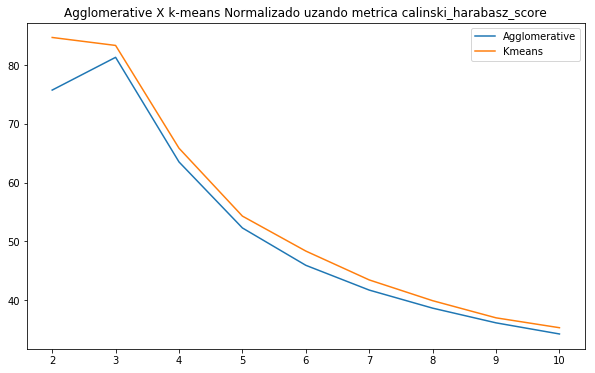

In [24]:
# tecnica de aglutinação com normalização com metrica calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import calinski_harabasz_score

f, ( ax2) = plt.subplots(1, figsize=(10, 6))

ax2.plot(k_range, ch_norm, label='Agglomerative')
ax2.plot(k_range, ch_norm_kmeans, label='Kmeans')
ax2.set_title('Agglomerative X k-means Normalizado uzando metrica calinski_harabasz_score')
ax2.legend()

